In [35]:
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Create a plotting definition

In [45]:
def plot_map(ax,data):
    
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')

    # Defining cmap based on plot type: all difference plots are on the bottom, position divisible by 3 (after adding 1)
    #if (nplt+1)% 3 == 0:
    #    cmap = 'bwr'
    #else:
    #    vmin
    #    cmap='nipy_spectral'
    cmap=mymap
    ax.pcolor(lon_crn,lat_crn,data[1:-1,1:-1],vmin=vmin[nplt],vmax=vmax[nplt],cmap=cmap)
    
    ax.set_ylim(-55,15)
    ax.set_xlim(-120,-60)
    #ax.set_xlim(-180,-100)
    #ax.set_ylim(20,60)
    
    

In [37]:
# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.Blues(np.linspace(1, 0, 128))
colors2 = plt.cm.hot(np.linspace(1, 0, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

Objective: Making a figure with 3x3 plots showing the Humboldt Current System. All maps are the same area so we can itterate over the different data files and create the same map over and over but for different variables. 

0.48117092 29.46454
0.93985146 31.72346
-0.09869039 7.968176
8.845656e-07 0.123856544
1.5091746e-06 0.09006641
-0.033790134 0.0042635947
3.4050924e-08 3.8029634e-06
3.1290018e-08 4.1358126e-06
-9.609327e-07 3.3284914e-07


Text(0.5, 1.0, 'Chl')

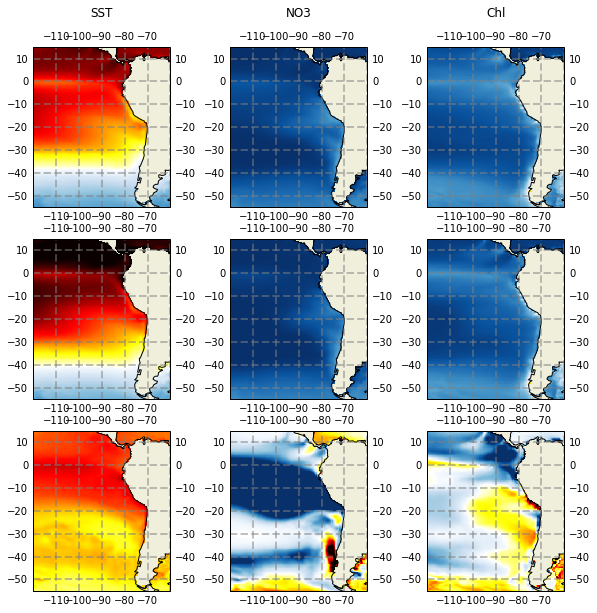

In [47]:
mod_vars = ['tos', 'no3os', 'chlos']
mod_tims = ['0961-1000','2061-2100']

#vmin = [0.5, 0.5, -3,   0,   0, -.002,     0,     0, -2e-7]
#vmax = [31,   31,  3, 0.1, 0.1,  .002, 4e-06, 4e-06,  2e-7]

vmin = [0,   0, -5,   0,   0, -.002,     0,     0, -2e-7]
vmax = [30, 30,  5, 0.1, 0.1,  .002, 3e-06, 3e-06,  2e-7]

proj = ccrs.PlateCarree()
#fig, axs = plt.subplots(3,3,subplot_kw=dict(projection=proj),figsize=(20, 10))
fig, axs = plt.subplots(3,3,subplot_kw=dict(projection=proj),figsize=(10, 10))

nplt=0
for var in mod_vars:
    var_dif = None
    for tim in mod_tims: 
        mod_fil = var + '_' + tim + '_Humboldt.nc'
        fid = nc.Dataset(mod_fil)
        var_val = fid.variables[var][:].squeeze()
        if nplt==0:
            xh = fid.variables['xh'][:].squeeze()
            yh = fid.variables['yh'][:].squeeze()
            lon_crn, lat_crn = np.meshgrid((xh[1:]+xh[:-1])/2,(yh[1:]+yh[:-1])/2)
        plot_map(axs.T.flatten()[nplt],var_val)
        print(np.min(var_val), np.max(var_val))
        nplt+=1
        if var_dif is None: 
            var_dif = var_val
        else:
            var_dif = var_val-var_dif
            # plot difference 
            plot_map(axs.T.flatten()[nplt],var_dif)
            print(np.min(var_dif), np.max(var_dif))
            nplt+=1
            
axs.T.flatten()[0].set_title('SST',pad=30)
axs.T.flatten()[3].set_title('NO3',pad=30)
axs.T.flatten()[6].set_title('Chl',pad=30)